<a href="https://colab.research.google.com/github/a7me3D/Telco-Customer-Churn/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [829]:
import pandas as pd

In [830]:
_df = pd.read_csv("TelcoCustomerChurn.csv")

In [831]:
_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [832]:
_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [833]:
for col_name in _df.columns:
  print(col_name, _df[col_name].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [834]:
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                     'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                     'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                     'PaperlessBilling', 'PaymentMethod']

numeric_cols = ['TotalCharges', "MonthlyCharges"]

In [835]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [836]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

multi_category_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


In [837]:
_df['TotalCharges'] = pd.to_numeric(_df['TotalCharges'], errors='coerce')
_df['TotalCharges'].fillna(_df['MonthlyCharges'], inplace=True)

In [838]:
preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(), multi_category_cols),
    ('ordinal', OrdinalEncoder(), binary_cols),
    ('numeric', "passthrough", numeric_cols)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_transformed = pipeline.fit_transform(_df)

one_hot_encoded_cols = (pipeline.named_steps['preprocessor']
            .named_transformers_['onehot']
            .get_feature_names_out(multi_category_cols)
            .tolist())

df = pd.DataFrame(X_transformed, columns=one_hot_encoded_cols + binary_cols + numeric_cols)

df.head()

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn,TotalCharges,MonthlyCharges
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,29.85,29.85
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1889.50,56.95
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,108.15,53.85
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1840.75,42.30
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,151.65,70.70


In [839]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   MultipleLines_No                         7043 non-null   float64
 1   MultipleLines_No phone service           7043 non-null   float64
 2   MultipleLines_Yes                        7043 non-null   float64
 3   InternetService_DSL                      7043 non-null   float64
 4   InternetService_Fiber optic              7043 non-null   float64
 5   InternetService_No                       7043 non-null   float64
 6   OnlineSecurity_No                        7043 non-null   float64
 7   OnlineSecurity_No internet service       7043 non-null   float64
 8   OnlineSecurity_Yes                       7043 non-null   float64
 9   OnlineBackup_No                          7043 non-null   float64
 10  OnlineBackup_No internet service         7043 no

In [840]:
import matplotlib.pyplot as plt
import seaborn as sns

# Standard Scaler in Feature Scaling

Feature scaling is a crucial preprocessing step in machine learning to ensure that numerical features contribute equally to the model training. One common method for scaling is the Standard Scaler.

## Standard Scaler

The Standard Scaler, or Z-score normalization, transforms the data by subtracting the mean and dividing by the standard deviation. This process standardizes the features, resulting in a distribution with a mean of 0 and a standard deviation of 1.


In [841]:
from sklearn.preprocessing import StandardScaler

In [842]:
scaler = StandardScaler()

In [843]:
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

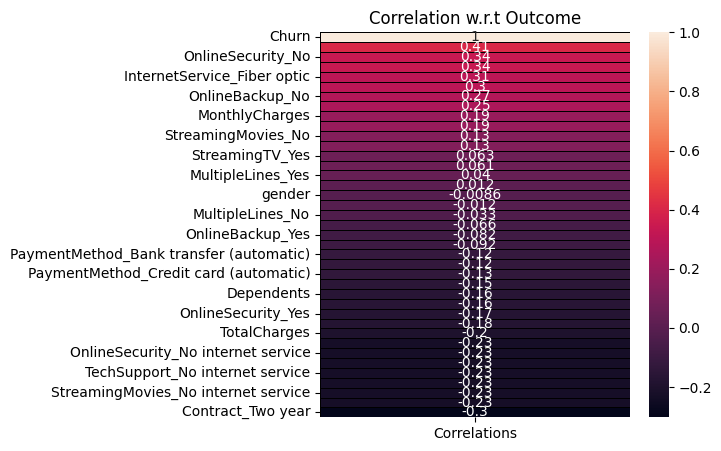

In [844]:
corr = df.corrwith(df['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome');

# Chi2 and ANOVA for Feature Selection

## Chi2 Test
- **Use Case:** Categorical variables, often applied in classification tasks.
- **Metric:** Measures the independence between a feature and the target variable using chi-squared values.
- **Selection Process:** Rank features based on chi2 values, select top features above a chosen threshold.

## ANOVA
- **Use Case:** Continuous variables, commonly used in regression scenarios.
- **Metric:** Assesses variance between group means, identifies features with significant mean differences.
- **Selection Process:** Rank features using the F-statistic, select top features based on a chosen threshold.


In [845]:
from sklearn.feature_selection import chi2, SelectKBest,f_classif

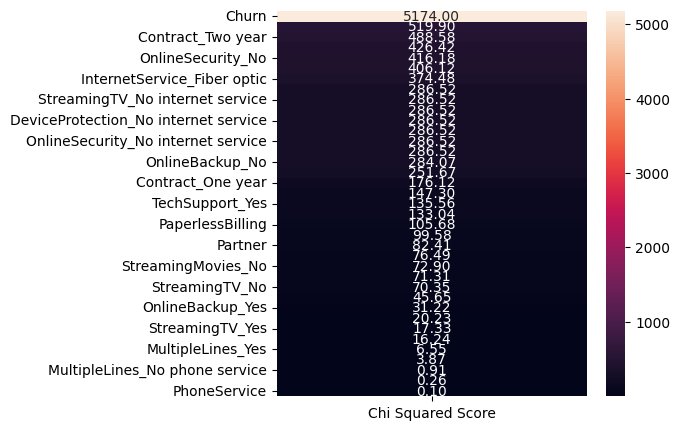

In [846]:
features = df.loc[:,one_hot_encoded_cols + binary_cols]
target = df.loc[:,'Churn']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'), annot=True, fmt = '.2f');

In [847]:
low_score_features = featureScores[featureScores["Chi Squared Score"] < 110].index.tolist()

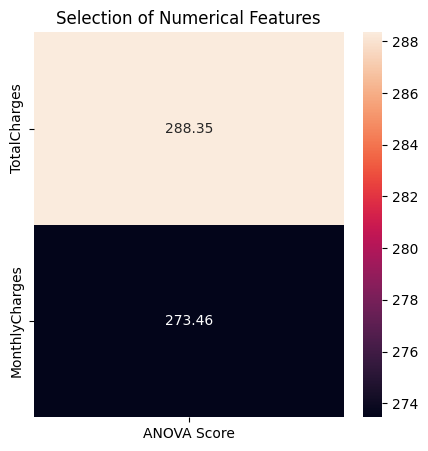

In [848]:
features = df.loc[:,numeric_cols]
target = df.loc[:,'Churn']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,fmt = '.2f');
plt.title('Selection of Numerical Features');

In [849]:
df.drop(columns = low_score_features,inplace = True)
df.head()

,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,DeviceProtection_No,DeviceProtection_No internet service,TechSupport_No,...,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,Dependents,Churn,TotalCharges,MonthlyCharges
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.992667,-1.160323
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.172198,-0.259629
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.958122,-0.362660
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.193706,-0.746535
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-0.938930,0.197365


In [850]:
from sklearn.model_selection import train_test_split

In [851]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [852]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.25)

In [853]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [854]:
from sklearn.model_selection import cross_val_score

In [855]:
from sklearn.metrics import confusion_matrix, recall_score, classification_report, roc_auc_score, f1_score, accuracy_score

In [856]:
models = [("LR", LogisticRegression(class_weight="balanced")), ("KNN", KNeighborsClassifier()), ("SVC", SVC(class_weight="balanced"))]

In [857]:
results = []
names = []
f1_scores = []
recall_scores = []
roc_auc_scores = []
acc_scores = []

for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, scoring="recall")
    results.append(cv_results)
    names.append(name)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    f1_scores.append(f1_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred))
    acc_scores.append(accuracy_score(y_test, y_pred))

compare = pd.DataFrame({
    "F1": f1_scores,
    "Recall": recall_scores,
    "ROC AUC": roc_auc_scores,
    "Accuracy": acc_scores
}, index=names)

In [858]:
compare

,F1,Recall,ROC AUC,Accuracy
LR,0.593371,0.785867,0.737215,0.714367
KNN,0.525275,0.511777,0.677063,0.754685
SVC,0.582781,0.753747,0.726565,0.713799


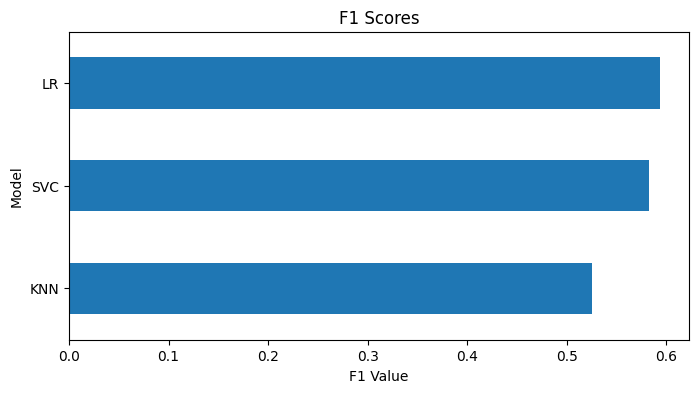

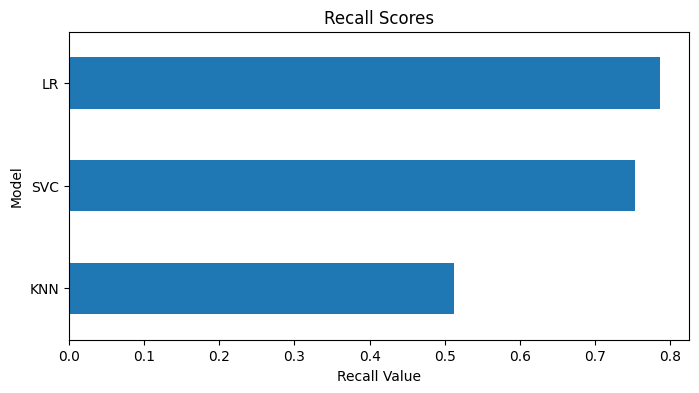

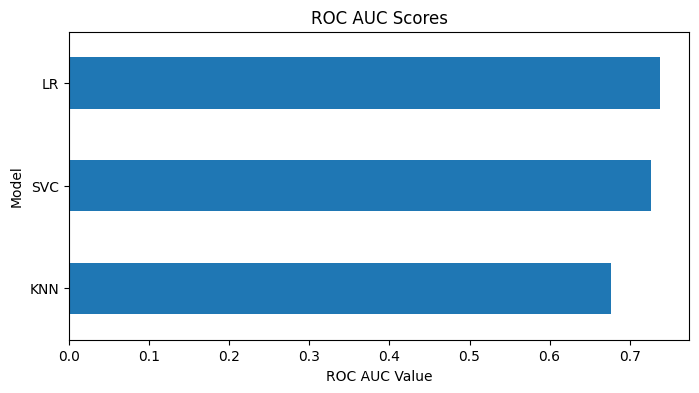

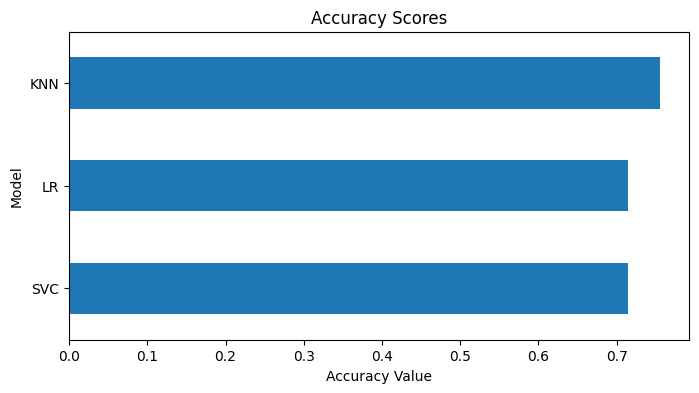

In [859]:
for score in compare.columns:
    plt.figure(figsize=(8, 4))
    compare[score].sort_values().plot(kind="barh")
    plt.title(f"{score} Scores")
    plt.xlabel(f"{score} Value")
    plt.ylabel("Model")
    plt.show()


In [860]:
from sklearn.model_selection import GridSearchCV

## Logistic Regression Hyperparameters

1. **C:**
   - **Meaning:** Inverse of regularization strength. Higher values for less regularization.
   - **Tuning:** Balance between model complexity and fitting to data.

2. **Penalty:**
   - **Meaning:** Regularization type. "l1" for sparsity, "l2" is default.
   - **Tuning:** Choose based on data characteristics.

3. **Solver:**
   - **Meaning:** Algorithm for optimization. "liblinear" for small datasets.
   - **Tuning:** "liblinear" is default. Consider "sag" or "lbfgs" for larger datasets.

4. **Max_iter:**
   - **Meaning:** Max iterations for convergence.
   - **Tuning:** Increase if needed, but monitor convergence behavior.

5. **Class_weight:**
   - **Meaning:** Weights for classes. Useful for imbalanced datasets.
   - **Tuning:** "balanced" adjusts automatically. Manual adjustment for specific imbalances.

In [861]:
logreg_fine_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': [50, 100, 150, 200],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid=logreg_fine_param_grid, scoring="recall", cv=5)


In [862]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [50, 100, 150, 200],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='recall')

In [863]:
grid_search.best_estimator_

LogisticRegression(C=0.001, class_weight='balanced', max_iter=50,
                   solver='liblinear')

In [864]:
y_pred = grid_search.predict(X_test)

logreg_f1_scores = f1_score(y_test, y_pred)
logreg_recall_scores = recall_score(y_test, y_pred)
logreg_roc_auc_scores = roc_auc_score(y_test, y_pred)
logreg_acc_scores = accuracy_score(y_test, y_pred)

In [865]:
logreg_metric = pd.DataFrame({
    "F1": logreg_f1_scores,
    "Recall": logreg_recall_scores,
    "ROC AUC": logreg_roc_auc_scores,
    "Accuracy": logreg_acc_scores
}, index=["fineTuned_LR",])

In [866]:
logreg_metric.append(compare.loc["LR"])

<ipython-input-866-3bfa6b123c77>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  logreg_metric.append(compare.loc["LR"])


,F1,Recall,ROC AUC,Accuracy
fineTuned_LR,0.577811,0.830835,0.726855,0.678024
LR,0.593371,0.785867,0.737215,0.714367
